In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
#Hacemos más grande el dataset
'''
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')


print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            
            img=Image.open(filepath)
            x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
            x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
            i = 0
            for batch in datagen.flow(x, batch_size=1,save_to_dir=root, save_prefix=str(i), save_format='jpeg'):
              i += 1
              if i > 5:
                break 

            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            
            if prevRoot !=root:
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Se ha hecho mayor el dataset de cada directorio')'''
#10 minutos

'\ndirname = os.path.join(os.getcwd(), \'/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores\')\nimgpath = dirname + os.sep \n \nimages = []\ndirectories = []\ndircount = []\nprevRoot=\'\'\ncant=0\ndatagen = ImageDataGenerator(\n        rotation_range=40,\n        width_shift_range=0.3,\n        height_shift_range=0.3,\n        shear_range=0.3,\n        zoom_range=0.3,\n        horizontal_flip=True,\n        fill_mode=\'nearest\')\n\n\nprint("leyendo imagenes de ",imgpath)\n \nfor root, dirnames, filenames in os.walk(imgpath):\n    for filename in filenames:\n        if re.search("\\.(jpg|jpeg|png|bmp|tiff)$", filename):\n            cant=cant+1\n            filepath = os.path.join(root, filename)\n            \n            img=Image.open(filepath)\n            x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)\n            x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)\n            i = 0\n          

In [3]:
#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)

            image=Image.open(filepath)
            new_img = image.resize((100,100))#Redimencionamos todas las imagenes a un mismo tamaño
            new_img.save('s.png','png')#Las guardamos
            image = plt.imread('s.png')
            images.append(image)

            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/Jeremy Renner 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/Scarlett Johansson 167
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/Chris Hemsworth 201
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/Robert Downey Jr 159
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/Chris Evans 233
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/Actores rostros/Mark Ruffalo 166
Directorios leidos: 6
Imagenes en cada directorio [168, 201, 159, 233, 166, 177]
suma Total de imagenes en subdirectorios: 1104


In [35]:
#Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1104


In [36]:
#Indicamos la etiquiqueta 
actores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    actores.append(name[len(name)-1])
    indice=indice+1

0 Jeremy Renner
1 Scarlett Johansson
2 Chris Hemsworth
3 Robert Downey Jr
4 Chris Evans
5 Mark Ruffalo


In [48]:
print(actores)

['Jeremy Renner', 'Scarlett Johansson', 'Chris Hemsworth', 'Robert Downey Jr', 'Chris Evans', 'Mark Ruffalo']


In [37]:
#convierto de lista a numpy
y = np.array(labels)
X = np.array(images) 


classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)

Total de npumero de salidad:  6
Salida de cada clase :  [0 1 2 3 4 5]


In [38]:
#Dividimos los datos en datos de entrenamiento y testeo
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
print('Forma de los datos de entrenamiento: ', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

Forma de los datos de entrenamiento:  (993, 100, 100, 3) (993,)
Forma de los datos de prueba :  (111, 100, 100, 3) (111,)


Text(0.5, 1.0, 'Clase : 2 Chris Hemsworth')

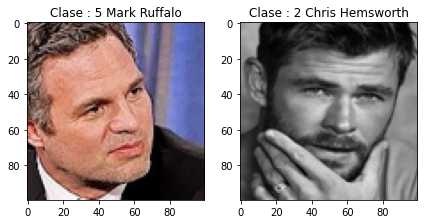

In [58]:
#Graficamos la primera imagen de testeo y entrenamiento
plt.figure(figsize=[7,7])
from random import randint, uniform,random

s=randint(0,900)
m=randint(0,100)
plt.subplot(121)
plt.imshow(train_X[s,:,:], cmap='gray')
plt.title("Clase : {}".format(train_Y[s])+' '+str(actores[train_Y[s]]))


plt.subplot(122)
plt.imshow(test_X[m,:,:], cmap='gray')
plt.title("Clase : {}".format(test_Y[m])+' '+str(actores[test_Y[m]]))

In [59]:
# Cambiamos las etiquetas a one-hot encondig
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Etiqueta original:', train_Y[0])
print('Etiqueta en one-hot:', train_Y_one_hot[0])

Etiqueta original: 0
Etiqueta en one-hot: [1. 0. 0. 0. 0. 0.]


In [60]:
#Crear los grupos de entrenamiento y validación
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [61]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(893, 100, 100, 3) (100, 100, 100, 3) (893, 6) (100, 6)


In [62]:
#declaramos variables con los parámetros de configuración de la red
epochs = 70 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [63]:
actor_model = Sequential()
actor_model.add(Conv2D(16, (4, 4), input_shape=(100, 100,3)))
actor_model.add(Activation('relu'))
actor_model.add(MaxPooling2D(pool_size=(2, 2)))

actor_model.add(Conv2D(16, (3, 3)))
actor_model.add(Activation('relu'))
actor_model.add(MaxPooling2D(pool_size=(2, 2)))

actor_model.add(Conv2D(36, (3, 3)))
actor_model.add(Activation('relu'))
actor_model.add(MaxPooling2D(pool_size=(3, 3)))
         
actor_model.add(Flatten())
actor_model.add(Dense(128))
actor_model.add(Activation('relu'))

actor_model.add(Dense(60))
actor_model.add(Activation('relu'))

actor_model.add(Dense(32))
actor_model.add(Activation('relu'))

actor_model.add(Dropout(0.25))
actor_model.add(Dense(len(directories)))
actor_model.add(Activation('softmax'))

In [64]:

actor_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer='adam',
                     metrics=['accuracy'])

In [65]:
actor_train = actor_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(valid_X, valid_label))

Epoch 1/70
28/28 [==============================] - 7s 239ms/step - loss: 1.7924 - accuracy: 0.1923 - val_loss: 1.7971 - val_accuracy: 0.1700
Epoch 2/70
28/28 [==============================] - 6s 226ms/step - loss: 1.7597 - accuracy: 0.2140 - val_loss: 1.7743 - val_accuracy: 0.1700
Epoch 3/70
28/28 [==============================] - 6s 226ms/step - loss: 1.7458 - accuracy: 0.2344 - val_loss: 1.7087 - val_accuracy: 0.3300
Epoch 4/70
28/28 [==============================] - 6s 226ms/step - loss: 1.6772 - accuracy: 0.3349 - val_loss: 1.5778 - val_accuracy: 0.4100
Epoch 5/70
28/28 [==============================] - 6s 231ms/step - loss: 1.5714 - accuracy: 0.3572 - val_loss: 1.4667 - val_accuracy: 0.4400
Epoch 6/70
28/28 [==============================] - 6s 229ms/step - loss: 1.3676 - accuracy: 0.4387 - val_loss: 1.3374 - val_accuracy: 0.5300
Epoch 7/70
28/28 [==============================] - 6s 229ms/step - loss: 1.2968 - accuracy: 0.5201 - val_loss: 1.3111 - val_accuracy: 0.4900
Epoch 

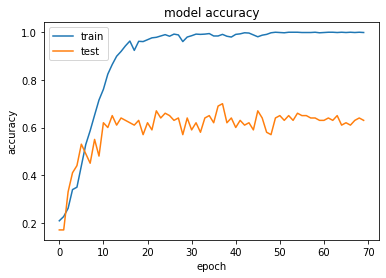

In [66]:
# summarize history for accuracy
plt.plot(actor_train.history['accuracy'])
plt.plot(actor_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

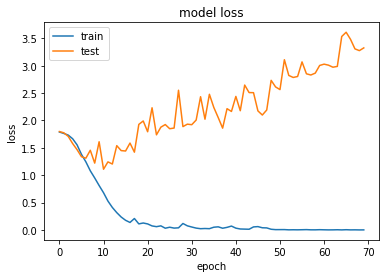

In [67]:
plt.plot(actor_train.history['loss'])
plt.plot(actor_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

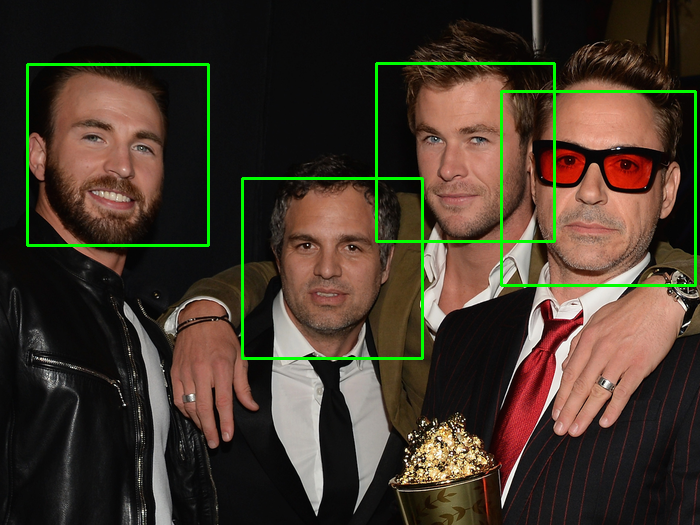

In [76]:
import cv2
from google.colab.patches import cv2_imshow
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
image = cv2.imread('/content/5ccb304a93a1525f1a1a4e54.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageAux=image.copy()
faces = faceClassif.detectMultiScale(gray,
  scaleFactor=1.1,
  minNeighbors=1,
  minSize=(170,120),
  maxSize=(800,800))

for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

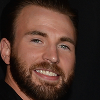

[4] Chris Evans


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


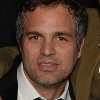

[2] Chris Hemsworth


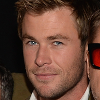

[2] Chris Hemsworth


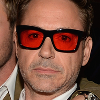

[2] Chris Hemsworth


In [77]:
contador=0

for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
  rostro=imageAux[y:y+h,x:x+w]
  rostro=cv2.resize(rostro,(100,100),interpolation=cv2.INTER_CUBIC)
  cv2.imwrite('rostro_{}.jpg'.format(contador),rostro)
  contador=contador+1
  cv2_imshow(rostro)
  #cv2_imshow(image)
  cv2.waitKey(0)
  rostro=rostro/255
  rostro= np.expand_dims(rostro, axis=0)
  y=actor_model.predict_classes(rostro)
  print(y,actores[y[0]])
cv2.destroyAllWindows()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


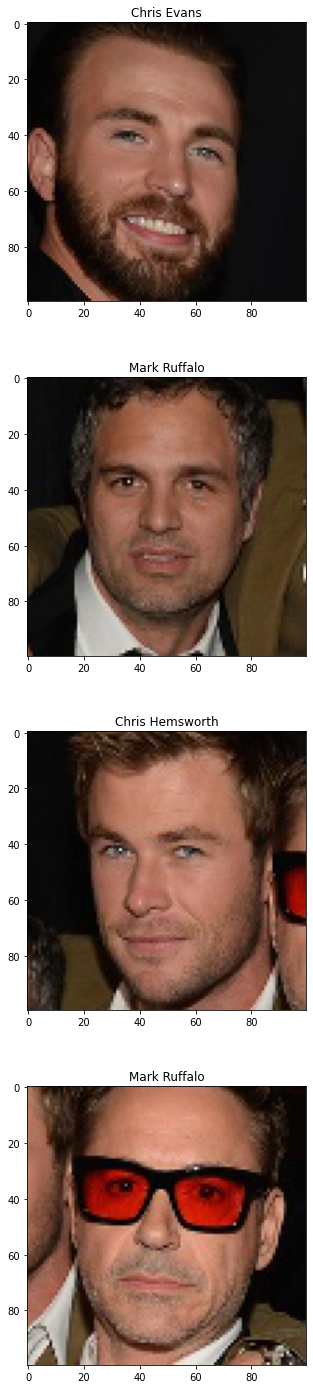

In [78]:
from PIL import Image
import matplotlib.pyplot as plt
predicciones=[]
fig = plt.figure(figsize=(5,5*5))
for i in range(4):
  face=plt.imread('rostro_{}.jpg'.format(i))
  plt.subplot(4,1,i+1)
  plt.imshow(face)
  face=face/255
  face=np.expand_dims(face,axis=0)
  y=actor_model.predict_classes(face)
  predicciones.append(actores[y[0]])
  plt.title(actores[y[0]])

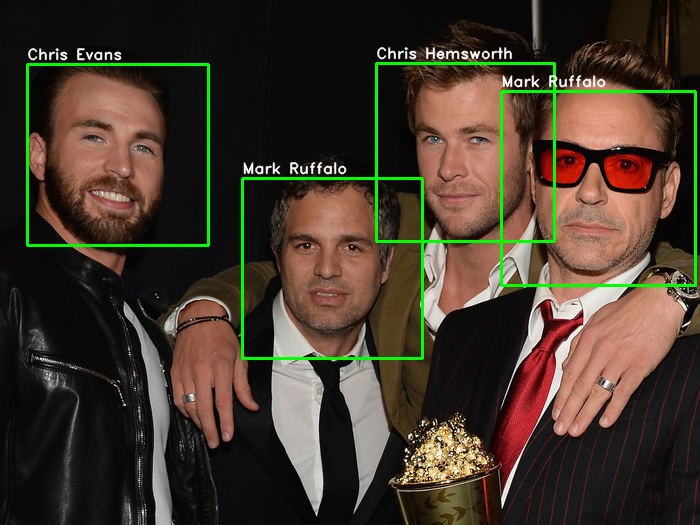

In [79]:
contador_nombres=0
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
  cv2.putText(image,predicciones[contador_nombres],(x,y-5),2,0.5,(255,255,255),1,cv2.LINE_AA)
  contador_nombres=contador_nombres+1
cv2_imshow(image)
cv2.destroyAllWindows()